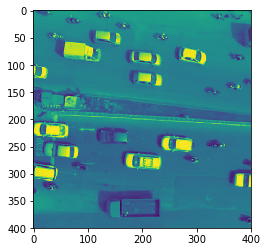

In [2]:
import numpy as np
import skimage
import scipy
import matplotlib
import matplotlib.pyplot as plt
from skimage import io
from skimage import morphology
from skimage.measure import regionprops
URL = 'sample_top1.JPG'
img = io.imread(URL,flatten=True)
img = img[0:400,100:500]
# img = img[205:400]
plt.imshow(img)
plt.show()

C:\Users\user\AppData\Local\Continuum\Anaconda2\lib\site-packages\scipy\ndimage\measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


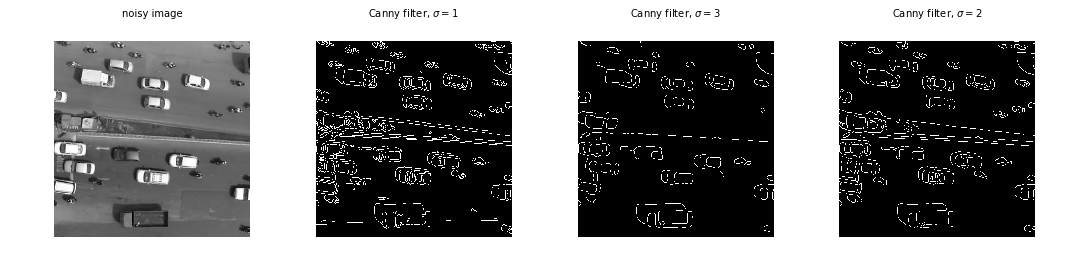

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature


# Compute the Canny filter for two values of sigma
edges1 = feature.canny(img)
edges2 = feature.canny(img, sigma=3)
edges3 = feature.canny(img, sigma=2)
# display results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15,4),
                                    sharex=True, sharey=True)

ax1.imshow(img, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=10)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=10)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=10)

ax4.imshow(edges3, cmap=plt.cm.gray)
ax4.axis('off')
ax4.set_title('Canny filter, $\sigma=2$', fontsize=10)

fig.tight_layout()

plt.show()

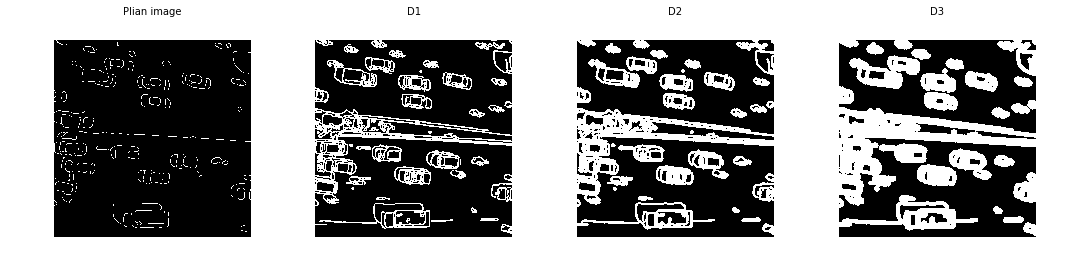

In [4]:
from skimage.morphology import closing,dilation,opening,white_tophat,erosion,skeletonize,disk
d1 = disk(1)
d2 = disk(2)
d3 = disk(4)
dilated =dilation(edges1,d1) 
dilated1 =dilation(edges1,d2) 
dilated2 =dilation(edges1,d3) 

# display results
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(15,4),
                                    sharex=True, sharey=True)

ax1.imshow(edges2, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Plian image', fontsize=10)

ax2.imshow(dilated, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('D1', fontsize=10)

ax3.imshow(dilated1, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('D2', fontsize=10)

ax4.imshow(dilated2, cmap=plt.cm.gray)
ax4.axis('off')
ax4.set_title('D3', fontsize=10)

fig.tight_layout()

plt.show()

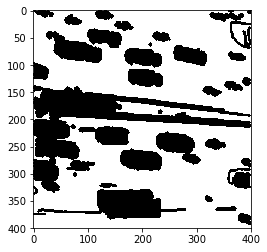

In [5]:
from scipy import ndimage as ndi
fill_holes = ndi.binary_fill_holes(dilated1)
plt.imshow(fill_holes,cmap='Greys',  interpolation='nearest')
plt.show()

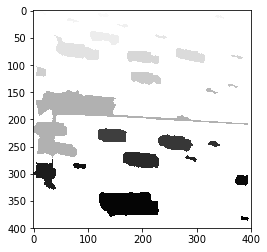

In [6]:
ske = erosion(fill_holes,disk(5))
labels = morphology.label(~ske, background=1)
labels = morphology.remove_small_objects(labels,40)
plt.imshow(labels,cmap='Greys',  interpolation='nearest')
plt.show()

In [7]:
import sklearn
from sklearn import svm
i=0;
a = [];
for region in regionprops(labels):
    b = [region.area,region.perimeter];
    a.append(b)
    i = i+1
print(a)
print(len(a))
b = [0,0,0,0,0,1,0,2,1,1,0,1,1,0,0,2,1,1,0,1,0,1,0,1,2,0]
print(b)
print(len(b))

[[49, 31.349242404917497], [101, 49.2842712474619], [49, 34.520815280171306], [93, 46.83452377915607], [86, 47.83452377915607], [836, 144.3259018078045], [103, 51.698484809834994], [1904, 232.47413408594537], [944, 144.32590180780454], [1069, 157.7401153701776], [75, 47.83452377915607], [287, 68.6274169979695], [1006, 147.74011537017762], [70, 43.798989873223334], [93, 48.49137802864845], [9727, 1255.8549057834389], [1158, 145.01219330881975], [1373, 166.67514421272202], [159, 54.83452377915607], [1627, 175.9827560572969], [125, 53.07716446627535], [1316, 194.50966799187808], [202, 63.21320343559642], [389, 79.8700576850888], [4169, 294.22539674441623], [90, 39.55634918610404]]
26
[0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0]
26


In [8]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(a,b)  
#SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',max_iter=-1, probability=False, random_state=None, shrinking=True,tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
clf.predict([[40, 120]])

array([0])

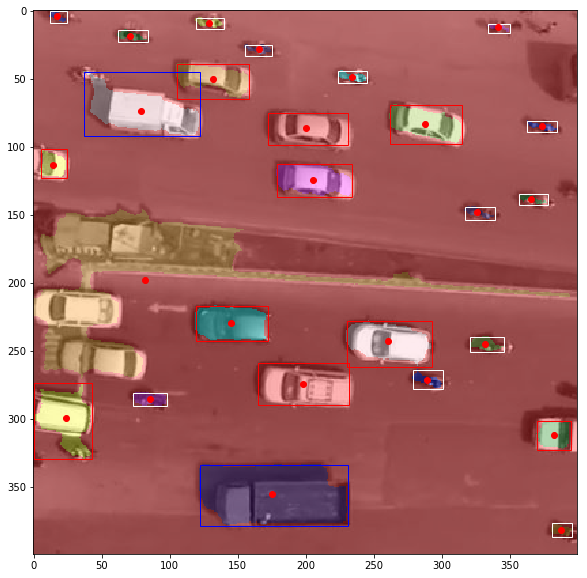

In [10]:
from scipy import ndimage
X = []
Y = []
for i in np.unique(labels)[1:]:
    X.append(ndimage.measurements.center_of_mass(labels == i)[1])
    Y.append(ndimage.measurements.center_of_mass(labels == i)[0])

from skimage.color import label2rgb
import matplotlib.patches as mpatches

label_overlay = label2rgb(labels, image=img)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
ax.imshow(label_overlay)

for region in regionprops(labels):
    pr = clf.predict([[region.area,region.perimeter]])
    #print(pr[0])
    if region.area < 40 or region.area > 6000:
        continue    
    minr, minc, maxr, maxc = region.bbox
    if pr[0]==0:
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,fill=False, edgecolor='white', linewidth=1)
    elif pr[0]==1:
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,fill=False, edgecolor='red', linewidth=1)
    else:
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,fill=False, edgecolor='blue', linewidth=1)
    ax.add_patch(rect)
plt.plot(X,Y,'ro')
plt.show()

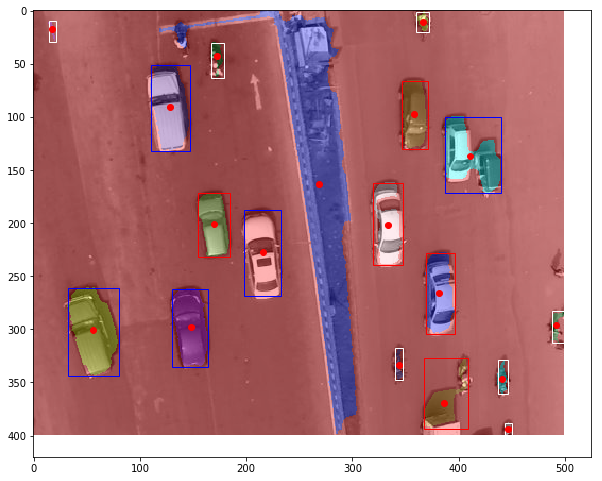

In [10]:
import numpy as np
import skimage,scipy
import matplotlib
import matplotlib.pyplot as plt
from skimage import io
from skimage import morphology
from skimage.measure import regionprops
URL = 'D:/others/aerial imagery/sample3.JPG'
img = io.imread(URL,flatten=True)
img = img[50:450,100:600]
edges1 = feature.canny(img)
dilated1 =dilation(edges1,disk(2))
fill_holes = ndi.binary_fill_holes(dilated1)
ske = erosion(fill_holes,disk(5))
labels = morphology.label(~ske, background=1)
labels = morphology.remove_small_objects(labels,40)
from scipy import ndimage
X = []
Y = []
for i in np.unique(labels)[1:]:
    X.append(ndimage.measurements.center_of_mass(labels == i)[1])
    Y.append(ndimage.measurements.center_of_mass(labels == i)[0])

from skimage.color import label2rgb
import matplotlib.patches as mpatches

label_overlay = label2rgb(labels, image=img)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
ax.imshow(label_overlay)

for region in regionprops(labels):
    pr = clf.predict([[region.area,region.perimeter]])
    #print(pr[0])
    if region.area < 40 or region.area > 6000:
        continue    
    minr, minc, maxr, maxc = region.bbox
    if pr[0]==0:
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,fill=False, edgecolor='white', linewidth=1)
    elif pr[0]==1:
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,fill=False, edgecolor='red', linewidth=1)
    else:
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,fill=False, edgecolor='blue', linewidth=1)
    ax.add_patch(rect)
plt.plot(X,Y,'ro')
plt.show()